## Zadanie 1

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.316693  [   64/60000]
loss: 2.302498  [ 6464/60000]
loss: 2.285220  [12864/60000]
loss: 2.267158  [19264/60000]
loss: 2.256196  [25664/60000]
loss: 2.231347  [32064/60000]
loss: 2.229714  [38464/60000]
loss: 2.197872  [44864/60000]
loss: 2.200580  [51264/60000]
loss: 2.159374  [57664/60000]
Test Error: 
 Accuracy: 43.2%, Avg loss: 2.161373 

Epoch 2
-------------------------------
loss: 2.181397  [   64/60000]
loss: 2.167222  [ 6464/60000]
loss: 2.115144  [12864/60000]
loss: 2.117086  [19264/60000]
loss: 2.082606  [25664/60000]
loss: 2.023413  [32064/60000]
loss: 2.043833  [38464/60000]
loss: 1.963349  [44864/60000]
loss: 1.966809  [51264/60000]
loss: 1.899760  [57664/60000]
Test Error: 
 Accuracy: 56.0%, Avg loss: 1.899592 

Epoch 3
-------------------------------
loss: 1.938179  [   64/60000]
loss: 1.904304  [ 6464/60000]
loss: 1.794171  [12864/60000]
loss: 1.820709  [19264/60000]
loss: 1.731501  [25664/60000]
loss: 1.680440  [32064/600

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[32][0], test_data[32][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Dress", Actual: "Dress"


## Zadanie 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Transforms images to a PyTorch Tensor
# tensor_transform = ToTensor()

# # Download the MNIST Dataset
# dataset = datasets.MNIST(root = "./data",
# 						train = True,
# 						download = True,
# 						transform = tensor_transform)

# # DataLoader is used to load the dataset
# # for training
# loader = torch.utils.data.DataLoader(dataset = dataset,
# 									batch_size = 32,
# 									shuffle = True)
dataset = datasets.FashionMNIST(
    root="data",
    download=True,
    transform=ToTensor(),
)

loader = torch.utils.data.DataLoader(dataset = dataset,
									batch_size = 32,
									shuffle = True)

100%|██████████| 26421880/26421880 [00:12<00:00, 2038578.25it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 170240.84it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3126366.82it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4378884.00it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()

		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9)
		)

		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


In [5]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)

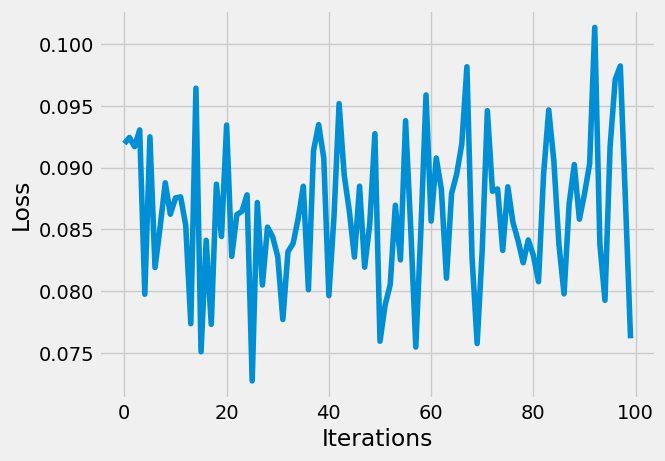

In [8]:
epochs = 5
outputs = []
losses = []
for epoch in range(epochs):
  for (image, _) in loader:

    # Reshaping the image to (-1, 784)
    image = image.reshape(-1, 28*28)

    # Output of Autoencoder
    reconstructed = model(image)

    # Calculating the loss function
    loss = loss_function(reconstructed, image)

    # The gradients are set to zero,
    # the gradient is computed and stored.
    # .step() performs parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Storing the losses in a list for plotting
    losses.append(loss)
  outputs.append((epochs, image, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

losses_tensor = torch.tensor(losses)

# Plotting the last 100 values
plt.plot(losses_tensor[-100:].detach().numpy())


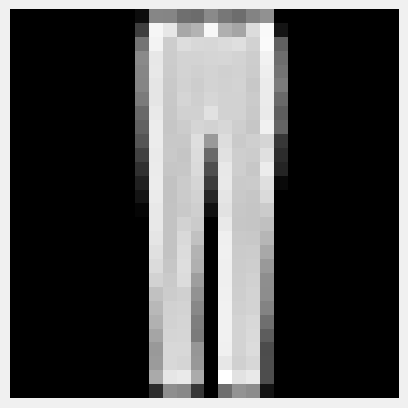

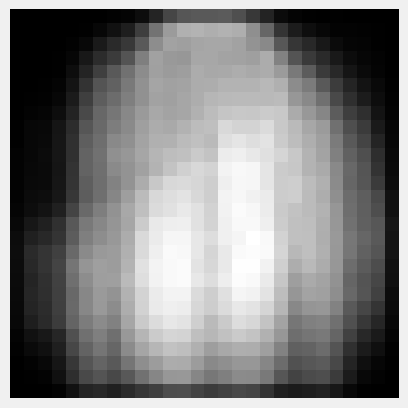

In [11]:
for i, item in enumerate(image):
  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().numpy(), 'gray')
plt.axis('off')
plt.show()

for i, item in enumerate(reconstructed):
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0].detach().numpy(), 'gray')
plt.axis('off')
plt.show()